![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Dataframes de Pandas

## Introducción

Un DataFrame de Python es una tabla 2-dimensional, potencialmente hetereogéna y con ejes etiquetados (filas y columnas).

Los DataFrames de Pandas consisten básicamente de 3 elementos principales:
-  datos (*data*)
-  filas (*rows*)
-  columnas (*columns*)

![title](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)

**Importante!** La notación nos recomienda siempre que creemos DataFrames darles nombres con sentido, derivados del acrónimo **d**ata**f**rame: df, df1, df2 etc

|Parámetro|Descripción|
|--------|------------|
|**data**| Los datos que incorpora como unpit pueden tener varias formas como: *ndarray*, *series*, *list*, *dict*, o otros dataframes
|**index**| Al ser una estructura 2-d tanto las filas como las columnas llevan etiquetas, siendo **las etiquetas de las filas** predeterminadas a *np.arange(n)* si no se especifican de otra forma|
|**columns**| Las etiquetas de las columnas están prestablecidas a *np.arange(n)* si no se especifican de otra forma|
|**dtype**| Tipo de datos de **cada** columan|
|**copy**| Este comando se utiliza para copiar los datos inputados. Por default está a False

In [ ]:
import pandas as pd

## Creación de un DataFrame

### Crear DataFrame vacío

In [ ]:
df = pd.DataFrame()

In [ ]:
df

""


### DataFrame de una Lista

In [ ]:
lista = ['uno','dos','tres']

In [ ]:
df = pd.DataFrame(lista)

In [ ]:
df

,0
0,uno
1,dos
2,tres


##### EJEMPLO - DataFrame 2d - a partir de lista de listas

In [ ]:
lista_de_listas = [["Ana",25], ["Yolanda", 35] , ["Eduardo", 14]]

In [ ]:
df = pd.DataFrame(lista_de_listas)

In [ ]:
df

,0,1
0,Ana,25
1,Yolanda,35
2,Eduardo,14


In [ ]:
df = pd.DataFrame(lista_de_listas, index=['Est.1','Est.2','Est.3'])

In [ ]:
df

,0,1
Est.1,Ana,25
Est.2,Yolanda,35
Est.3,Eduardo,14


In [ ]:
df = pd.DataFrame(lista_de_listas, index=['Est.1','Est.3','Est.3'])

In [ ]:
df

,0,1
Est.1,Ana,25
Est.3,Yolanda,35
Est.3,Eduardo,14


In [ ]:
df = pd.DataFrame(data=lista_de_listas, index=['Est.1','Est.2','Est.3'],columns=["Nombre","Edad"])

In [ ]:
df

,Nombre,Edad
Est.1,Ana,25
Est.2,Yolanda,35
Est.3,Eduardo,14


*EJEMPLO - DataFrame 2d - asignar nombre a columnas*

### DataFrame de un Diccionario de listas

In [ ]:
dic_listas = {"nombres":['Tomas','Elena','Juana','Enrique'],"edades":[28,34,29,42]}

In [ ]:
df_dic = pd.DataFrame(dic_listas)

In [ ]:
df_dic

,nombres,edades
0,Tomas,28
1,Elena,34
2,Juana,29
3,Enrique,42


##### EJEMPLO - Creación df con un diccionario + etiquetas

In [ ]:
filas = ["Est_1","Est_2","Est_3","Est_4"]

In [ ]:
df_dic=pd.DataFrame(dic_listas,index=filas)

In [ ]:
df_dic

,nombres,edades
Est_1,Tomas,28
Est_2,Elena,34
Est_3,Juana,29
Est_4,Enrique,42


### DataFrame de una Lista de Diccionarios

##### EJEMPLO  - sin etiqueta en índice

In [ ]:
lista_dicts = [  {'a': 1, 'b': 2}  ,    {'a': 5, 'b': 10, 'c': 20} ]
lista_dicts

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
df1 = pd.DataFrame(lista_dicts)

In [ ]:
df1

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
df1.index

RangeIndex(start=0, stop=2, step=1)

### Indexar un DataFrame: .index

## Exploración de DataFrames

### Atributos de un DataFrame

|df.attribute|Descripción|
|----|----|
|**dtypes**| lista todos los tipos de datos de las columnas del dataframe |
|**columns**| lista el nombre de las columnas |
|**axes**| lista las etiquetas de las filas y nombres de las columnas |
|**ndim**| nº de dimensiones del dataframe|
|**size**| nº de elementos del dataframe|
|**shape**| devuelve  una tupla que representa la dimensionalidad del df, (*filas*x*columnas*)|
|**values**| representación NumPy de los datos|

Vamos a explorar un dataframe mediante los atributos del objeto.

In [ ]:
d = {'uno' : pd.Series([10, 12, 3], index=['fila1', 'fila2', 'fila3']),
   'two' : pd.Series([15.0, 2.0, 4.0], index=['fila1', 'fila2', 'fila3'])}

In [ ]:
s = pd.Series([1,2,3],index=['fila1', 'fila2', 'fila3'])

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
pd.DataFrame(s)

,0
fila1,1
fila2,2
fila3,3


In [ ]:
df1 = pd.DataFrame(d)

In [ ]:
df1

,uno,two
fila1,10,15.0
fila2,12,2.0
fila3,3,4.0


In [ ]:
d2 = {'uno' : pd.Series([10, 12, 3], index=['fila1', 'fila2', 'fila3']),
   'two' : pd.Series([15.0, 2.0, 4.0], index=['fila1', 'fila2', 'fila4'])}

In [ ]:
pd.DataFrame(d2)

,uno,two
fila1,10.0,15.0
fila2,12.0,2.0
fila3,3.0,NaN
fila4,NaN,4.0


In [ ]:
d3 = {'uno' : [10, 12, 3],
   'two' : [15.0, 2.0, 4.0]}

In [ ]:
pd.DataFrame(d3,index=['fila1', 'fila2', 'fila3'])

,uno,two
fila1,10,15.0
fila2,12,2.0
fila3,3,4.0


In [ ]:
df1.index=["EST1","EST2","EST3"]

In [ ]:
df1

,uno,two
EST1,10,15.0
EST2,12,2.0
EST3,3,4.0


In [ ]:
df1.columns = ["uno","dos"]

In [ ]:
df1

,uno,dos
EST1,10,15.0
EST2,12,2.0
EST3,3,4.0


In [ ]:
df1.ndim

2

In [ ]:
s.ndim

1

In [ ]:
df1.shape

(3, 2)

In [ ]:
df1.size

6

### Métodos de un DataFrame

|df.**method()**|Descripción|
|----|----|
|**info()**| información básica del df
|**head(n)**| lista las primeras *n* filas |
|**tail(n)**| lista las últimas *n* filas |
|**describe()**| genera algunas métricas estadísticas descriptivas del dataframe, sólo para columnas numérics |
|**max()**| devuelve el valor máximo de cada columna numérica |
|**min()**| devuelve el valor mínimo de cada columna numérica |
|**std()**| devuelve la desviación estándar de cada columna numérica |
|**sample(n)**| devuelve un set aleatorio del dataframe |
|**dropna()**| elimina todos los elementos con valores nulos |


In [ ]:
diccionario_gente = {

    'Nombre':['Tomás', 'Elena', 'Juana', 'Enrique'],
    'Edad':[28,34,29,42],
    'Ciudad':['Barcelona',"Tarragona",2,"Huesca"],
    "Hermanos":[1,2,3,0]


}
diccionario_gente

{'Nombre': ['Tomás', 'Elena', 'Juana', 'Enrique'],
 'Edad': [28, 34, 29, 42],
 'Ciudad': ['Barcelona', 'Tarragona', 2, 'Huesca'],
 'Hermanos': [1, 2, 3, 0]}

Ejemplo: Genera un df del diccionario anterior y asígnale como indice de filas "Estudiante 1", "Estudiante 2", etc, y aplica cada uno de los métodos de la tabla anterior. Comentemos resultados.

In [ ]:
df = pd.DataFrame(diccionario_gente,index=["Estudiante 1","Estudiante 2","Estudiante 3","Estudiante 4"])

In [ ]:
df

,Nombre,Edad,Ciudad,Hermanos
Estudiante 1,Tomás,28,Barcelona,1
Estudiante 2,Elena,34,Tarragona,2
Estudiante 3,Juana,29,2,3
Estudiante 4,Enrique,42,Huesca,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Estudiante 1 to Estudiante 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Nombre    4 non-null      object
 1   Edad      4 non-null      int64 
 2   Ciudad    4 non-null      object
 3   Hermanos  4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 332.0+ bytes


In [ ]:
df.describe()

,Edad,Hermanos
count,4.000000,4.000000
mean,33.250000,1.500000
std,6.396614,1.290994
min,28.000000,0.000000
25%,28.750000,0.750000
50%,31.500000,1.500000
75%,36.000000,2.250000
max,42.000000,3.000000


In [ ]:
df.describe(include='all')

,Nombre,Edad,Ciudad,Hermanos
count,4,4.000000,4,4.000000
unique,4,NaN,4,NaN
top,Tomás,NaN,Barcelona,NaN
freq,1,NaN,1,NaN
mean,NaN,33.250000,NaN,1.500000
std,NaN,6.396614,NaN,1.290994
min,NaN,28.000000,NaN,0.000000
25%,NaN,28.750000,NaN,0.750000
50%,NaN,31.500000,NaN,1.500000
75%,NaN,36.000000,NaN,2.250000


In [ ]:
df.head(2)

,Nombre,Edad,Ciudad,Hermanos
Estudiante 1,Tomás,28,Barcelona,1
Estudiante 2,Elena,34,Tarragona,2


In [ ]:
df.tail(2)

,Nombre,Edad,Ciudad,Hermanos
Estudiante 3,Juana,29,2,3
Estudiante 4,Enrique,42,Huesca,0


In [ ]:
df.max()

<ipython-input-63-4c1ddf8920ff>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


Nombre      Tomás
Edad           42
Hermanos        3
dtype: object

In [ ]:
df.sample(frac=1,random_state=45,replace=False)

,Nombre,Edad,Ciudad,Hermanos
Estudiante 1,Tomás,28,Barcelona,1
Estudiante 2,Elena,34,Tarragona,2
Estudiante 3,Juana,29,2,3
Estudiante 4,Enrique,42,Huesca,0


In [ ]:
df.sample(n=3,random_state=45,replace=False)

,Nombre,Edad,Ciudad,Hermanos
Estudiante 1,Tomás,28,Barcelona,1
Estudiante 2,Elena,34,Tarragona,2
Estudiante 3,Juana,29,2,3


### Trasponer el DataFrame - .T

In [ ]:
df.T

,Estudiante 1,Estudiante 2,Estudiante 3,Estudiante 4
Nombre,Tomás,Elena,Juana,Enrique
Edad,28,34,29,42
Ciudad,Barcelona,Tarragona,2,Huesca
Hermanos,1,2,3,0


### Ordenar DataFrame - sort_index(), sort_values()

#### Ordenar por índices - df.sort_index()

In [ ]:
dic_coches = {'Marca': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Precio': [22000,25000,27000,35000],
        'Año': [2015,2013,2018,2018]
        }
df = pd.DataFrame(dic_coches)
df

,Marca,Precio,Año
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


##### Ordenar columnas - axis = 1

In [ ]:
df.sort_index(axis=1)

,Año,Marca,Precio
0,2015,Honda Civic,22000
1,2013,Toyota Corolla,25000
2,2018,Ford Focus,27000
3,2018,Audi A4,35000


##### Ordenar filas - axis=0

In [ ]:
df.sort_index(axis=0, ascending=False)

,Marca,Precio,Año
3,Audi A4,35000,2018
2,Ford Focus,27000,2018
1,Toyota Corolla,25000,2013
0,Honda Civic,22000,2015


#### Ordenar por valores: df.sort_values()

In [ ]:
df.sort_values(['Año'])

,Marca,Precio,Año
1,Toyota Corolla,25000,2013
0,Honda Civic,22000,2015
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


##### Ordenar por múltiples campos

In [ ]:
df.sort_values(['Año',"Marca"])

,Marca,Precio,Año
1,Toyota Corolla,25000,2013
0,Honda Civic,22000,2015
3,Audi A4,35000,2018
2,Ford Focus,27000,2018


## Missing Data

### Borrar filas con missing data - .dropna( )

In [ ]:
df_n = pd.DataFrame(df,columns=['Marca','Precio','Año',1,2])

In [ ]:
df_n

,Marca,Precio,Año,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
df_n.dropna()

,Marca,Precio,Año,1,2


#### Borra toda fila o columna con al menos un NaN

#### Borra las columnas con al menos un Nan

#### Borra todas las filas con TODOS los elementos Nan

In [ ]:
df_n.dropna(how='all')

,Marca,Precio,Año,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
df_n.dropna(how='all',axis=1)

,Marca,Precio,Año
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


### Borra filas con cierto nº de NaN - .dropna( )

In [ ]:
df_n.dropna(thresh=3)

,Marca,Precio,Año,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
df_n.dropna(thresh=4)

,Marca,Precio,Año,1,2


In [ ]:
df_n.dropna?

### Rellena NaN valores - .fillna( )

In [ ]:
df_n.fillna(5)

,Marca,Precio,Año,1,2
0,Honda Civic,22000,2015,5.0,5.0
1,Toyota Corolla,25000,2013,5.0,5.0
2,Ford Focus,27000,2018,5.0,5.0
3,Audi A4,35000,2018,5.0,5.0


### Check dónde hay NaN - .isna( )

In [ ]:
df_n.isna()

,Marca,Precio,Año,1,2
0,False,False,False,True,True
1,False,False,False,True,True
2,False,False,False,True,True
3,False,False,False,True,True


### Eliminar duplicados - drop_duplicates()

Para eliminar duplicados usaremos el método drop_duplicates, que actua sobre los valores del Dataframe

In [ ]:
x = pd.DataFrame([[1, 2, 2, 4], [1, 2, 2, 4], [1, 2, 5, 3]])
x

,0,1,2,3
0,1,2,2,4
1,1,2,2,4
2,1,2,5,3


In [ ]:
x.drop_duplicates()

,0,1,2,3
0,1,2,2,4
2,1,2,5,3


In [ ]:
x.drop_duplicates(keep=False)

,0,1,2,3
2,1,2,5,3


In [ ]:
x.drop_duplicates(subset=[0,2])

,0,1,2,3
0,1,2,2,4
2,1,2,5,3


## Subset DataFrames

Mientras que las expresiones estándar de Python y NumPy para seleccionar columnas son fáciles e intuititvas, existen métodos especiales para realizar subsets de dataframes:

- .loc: selecciona una fila/columna mediante su nombre
- .iloc: selecciona una fila/columna mediante su índice
- .at: selecciona un único elemento mediante su nombre
- .iat: selecciona un único elemento mediante su índice

### Selección de Columnas

In [ ]:
dic_coches = {'Marca': ['Honda','Toyota','Ford'],
        'Precio': [22000,25000,27000],
        'Año': [2015,2013,2018]
        }
df = pd.DataFrame(dic_coches)
df.index = ["Laura","Lorenzo","Arnau"]
df

,Marca,Precio,Año
Laura,Honda,22000,2015
Lorenzo,Toyota,25000,2013
Arnau,Ford,27000,2018


#### Mediante el nombre de la columna - [ ] como Series

In [ ]:
s = df['Año']

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
s

Laura      2015
Lorenzo    2013
Arnau      2018
Name: Año, dtype: int64

#### Mediante el nombre de la columna - [ [ ] ] como df

In [ ]:
df[['Año']]

,Año
Laura,2015
Lorenzo,2013
Arnau,2018


#### Extraer múltiples columnas

In [ ]:
df[['Año','Marca']]

,Año,Marca
Laura,2015,Honda
Lorenzo,2013,Toyota
Arnau,2018,Ford


In [ ]:
df[:2]

,Marca,Precio,Año
Laura,Honda,22000,2015
Lorenzo,Toyota,25000,2013


In [ ]:
df[1::-1]

,Marca,Precio,Año
Lorenzo,Toyota,25000,2013
Laura,Honda,22000,2015


In [ ]:
df[::-1]

,Marca,Precio,Año
Arnau,Ford,27000,2018
Lorenzo,Toyota,25000,2013
Laura,Honda,22000,2015


### Selección de Filas

Existen dos métodos para seleccionar filas de un DataFrame:
- **.loc()** - **loc**aliza por el nombre
- **.iloc()** - **loc**aliza por **í**ndice numérico

#### Selecciona por etiqueta - .loc( )

In [ ]:
df.loc["Laura"]

Marca     Honda
Precio    22000
Año        2015
Name: Laura, dtype: object

#### Selecciona por índice - .iloc()

In [ ]:
df.iloc[0]

Marca     Honda
Precio    22000
Año        2015
Name: Laura, dtype: object

#### Mediante .loc() e .iloc() también podemos seleccionar columnas-- usando el doble indexado y hacer un subset de columnas[:,j]

In [ ]:
df.loc["Laura","Marca"]

'Honda'

In [ ]:
df.iloc[1,0]

'Toyota'

In [ ]:
type(df.iloc[0])

pandas.core.series.Series

In [ ]:
df.iloc[[0]]

,Marca,Precio,Año
Laura,Honda,22000,2015


In [ ]:
df.loc[["Laura"]]

,Marca,Precio,Año
Laura,Honda,22000,2015


#### Seleccionar múltiples filas (slicing o listas de índices)

In [ ]:
df.loc[["Laura","Arnau"]]

,Marca,Precio,Año
Laura,Honda,22000,2015
Arnau,Ford,27000,2018


In [ ]:
df.iloc[[0,1]]

,Marca,Precio,Año
Laura,Honda,22000,2015
Lorenzo,Toyota,25000,2013


In [ ]:
df.iloc[[0,1],[0,1]]

,Marca,Precio
Laura,Honda,22000
Lorenzo,Toyota,25000


In [ ]:
df[["Marca","Precio"]]

,Marca,Precio
Laura,Honda,22000
Lorenzo,Toyota,25000
Arnau,Ford,27000


In [ ]:
df.iloc[:,[0,1]]

,Marca,Precio
Laura,Honda,22000
Lorenzo,Toyota,25000
Arnau,Ford,27000


### Selecciona un elemento - .at( ), .iat( )

#### Selecciona un elemento por etiqueta -.at ( )

In [ ]:
df.at["Laura","Marca"]

'Honda'

#### Selecciona un elemento por índice - .iat( )

In [ ]:
df.iat[0,0]

'Honda'

### Selección condicional de filas

Además de seleccionar según filas y columnas, puede que queramos hacer una selección condicional, es decir; obtener valores de un dataframe que cumplan una condición determinada

In [ ]:
df[df["Año"]>2015][["Año"]]

,Año
Arnau,2018


In [ ]:
df[df["Año"]>2015][["Año","Marca"]]

,Año,Marca
Arnau,2018,Ford


In [ ]:
d = df[df["Año"]>2015]

In [ ]:
d[["Año","Marca"]]

,Año,Marca
Arnau,2018,Ford


#### Filtrar por condiciones booleanas

In [ ]:
df[(df["Año"]>2014) & (df["Precio"]>26000)]

,Marca,Precio,Año
Arnau,Ford,27000,2018


In [ ]:
df[(df["Año"]>2014) | (df["Precio"]>26000)]

,Marca,Precio,Año
Laura,Honda,22000,2015
Arnau,Ford,27000,2018


##### EJEMPLO: Seleccionar los coches posteriores a 2016

In [ ]:
coches_nuevos =(df['Año'] > 2016)

In [ ]:
coches_nuevos

Laura      False
Lorenzo    False
Arnau       True
Name: Año, dtype: bool

In [ ]:
df[coches_nuevos]

,Marca,Precio,Año
Arnau,Ford,27000,2018


##### EJEMPLO: Ahora queremos realizar el subset del dataframe

#### Filtrar por múltiples condiciones

Incluso podemos realizar subset de dataframes con **Múltiples condiciones** usando los operadores lógicos

##### EJEMPLO:  
Seleccionar los coches posteriores a 2016 y con menos de 20000€

In [ ]:
df[(df["Año"]>2016) & (df["Precio"]>20000)]

,Marca,Precio,Año
Arnau,Ford,27000,2018


#### Filtrar por contención - isin( )

##### EJEMPLO
Filtra los coches que son del año 2018

In [ ]:
df.isin([2018])

,Marca,Precio,Año
Laura,False,False,False
Lorenzo,False,False,False
Arnau,False,False,True


In [ ]:
df["Año"].isin([2018])

Laura      False
Lorenzo    False
Arnau       True
Name: Año, dtype: bool

In [ ]:
df["Año"].isin([2018,2013])

Laura      False
Lorenzo     True
Arnau       True
Name: Año, dtype: bool

In [ ]:
df[df["Año"].isin([2018,2013])]

,Marca,Precio,Año
Lorenzo,Toyota,25000,2013
Arnau,Ford,27000,2018


## Setting de un DataFrame

### Modificar un elemento

In [ ]:
df.iat[0,0] = 'Toyota'

In [ ]:
df

,Marca,Precio,Año
Laura,Toyota,22000,2015
Lorenzo,Toyota,25000,2013
Arnau,Ford,27000,2018


### Añadir columnas

Añadir una columna a un df es tan sencillo como:
1. asignar un nuevo nombre al dataframe (eso genera una columna nueva vacía)
2. llenar la nueva columna con una lista o array

##### EJEMPLO

In [ ]:
df["Kilometros"] = [1000,890,1792]

In [ ]:
df

,Marca,Precio,Año,Kilometros
Laura,Toyota,22000,2015,1000
Lorenzo,Toyota,25000,2013,890
Arnau,Ford,27000,2018,1792


### Drop columnas - .pop( )

Para eliminar columnas de un dataframe usaremos el método *.pop( )*, especificando el nombre de la columna a eliminar.

In [ ]:
df.pop("Kilometros")

Laura      1000
Lorenzo     890
Arnau      1792
Name: Kilometros, dtype: int64

In [ ]:
df

,Marca,Precio,Año
Laura,Toyota,22000,2015
Lorenzo,Toyota,25000,2013
Arnau,Ford,27000,2018


##### EJEMPLO

### Eliminar filas - .drop( )

Para eliminar filas de un dataframe **usamos el índice** de los elementos que deseamos eliminar del Dataframe. Si el índice estuviera duplicado, se eliminarían múltiples filas.

In [ ]:
df = df.drop("Laura")

In [ ]:
df

,Marca,Precio,Año
Lorenzo,Toyota,25000,2013
Arnau,Ford,27000,2018


## Concatenar DataFrames -.append( ), -concat( )

### Introducción

Añadir una columna a un dataframe es una operación  vectorial, es decir; **elemento a elemento**

### Anexionar filas - .append( )

Para añadir filas a un dataframe ya existente usaremos el método .append(); que anexiona filas al final de un dataframe

In [ ]:
d = {'columna 1' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'columna 2' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,columna 1,columna 2
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


#### Append elemento con columnas coincidentes

In [ ]:
df.append(df)

<ipython-input-174-8ddd54bd77dd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(df)


,columna 1,columna 2
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


#### Append si no tenemos mismas columnas?

In [ ]:
nueva_fila=[[1,2]]
f = pd.DataFrame(nueva_fila)

In [ ]:
f

,0,1
0,1,2


In [ ]:
df.append(f)

<ipython-input-177-ed77998f33d6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(f)


,columna 1,columna 2,0,1
a,1.0,1.0,NaN,NaN
b,2.0,2.0,NaN,NaN
c,3.0,3.0,NaN,NaN
d,NaN,4.0,NaN,NaN
0,NaN,NaN,1.0,2.0


### Concantenar - .concat( )

In [ ]:
import numpy as np

##### EJEMPLO: Concatenar en axis=0

In [ ]:
df=pd.DataFrame(np.random.randn(10,4))

In [ ]:
df2=pd.DataFrame(np.random.randn(2,4))

In [ ]:
df

,0,1,2,3
0,0.234466,1.769609,0.025886,-1.140508
1,-0.667922,-0.480674,-1.464376,-0.796644
2,0.505176,-1.336096,-0.032535,0.101344
3,-2.277157,0.665512,-0.667951,-0.002727
4,0.790986,0.410735,0.865276,0.302983
5,-0.084844,1.966033,-0.450831,-0.409629
6,-0.118086,-0.213784,-0.144716,0.632633
7,0.410754,-0.062752,-0.499992,0.213478
8,0.391376,0.033472,0.081679,-1.951998
9,-0.649130,-0.389004,1.520166,0.857450


In [ ]:
df2

,0,1,2,3
0,-2.371794,0.691485,0.122866,-0.903848
1,-0.024810,-1.255327,1.547076,0.884217


In [ ]:
concat_filas = pd.concat([df,df2],axis=0)

In [ ]:
concat_filas

,0,1,2,3
0,0.234466,1.769609,0.025886,-1.140508
1,-0.667922,-0.480674,-1.464376,-0.796644
2,0.505176,-1.336096,-0.032535,0.101344
3,-2.277157,0.665512,-0.667951,-0.002727
4,0.790986,0.410735,0.865276,0.302983
5,-0.084844,1.966033,-0.450831,-0.409629
6,-0.118086,-0.213784,-0.144716,0.632633
7,0.410754,-0.062752,-0.499992,0.213478
8,0.391376,0.033472,0.081679,-1.951998
9,-0.649130,-0.389004,1.520166,0.857450


##### EJEMPLO: Concatenar en axis=1

In [ ]:
concat_columnas = pd.concat([df,df2],axis=1)

In [ ]:
concat_columnas

,0,1,2,3,0,1,2,3
0,0.234466,1.769609,0.025886,-1.140508,-2.371794,0.691485,0.122866,-0.903848
1,-0.667922,-0.480674,-1.464376,-0.796644,-0.024810,-1.255327,1.547076,0.884217
2,0.505176,-1.336096,-0.032535,0.101344,NaN,NaN,NaN,NaN
3,-2.277157,0.665512,-0.667951,-0.002727,NaN,NaN,NaN,NaN
4,0.790986,0.410735,0.865276,0.302983,NaN,NaN,NaN,NaN
5,-0.084844,1.966033,-0.450831,-0.409629,NaN,NaN,NaN,NaN
6,-0.118086,-0.213784,-0.144716,0.632633,NaN,NaN,NaN,NaN
7,0.410754,-0.062752,-0.499992,0.213478,NaN,NaN,NaN,NaN
8,0.391376,0.033472,0.081679,-1.951998,NaN,NaN,NaN,NaN
9,-0.649130,-0.389004,1.520166,0.857450,NaN,NaN,NaN,NaN


![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Dataframes de Pandas II


In [ ]:
import pandas as pd

## Merge DataFrames- .merge( )

**Realizar joins es especialmente útil para linkar tablas una de las cuales tiene información adicional (columnas adicionales) que complementa la tabla original**.

Este es el razonamiento usado en **SQL**.

El join se realiza mediante el comando *.merge( )*, que tiene los siguientes parámetros:

Dónde:
- df_1: es el dataframe a unir con
- df_2: el segundo dataframe
- on: indica el join key o columna común a partir de la cual se combinan df_1 y df_2
- how: es el tipo de join a realizar

En Pandas existen **4 tipos de joins**

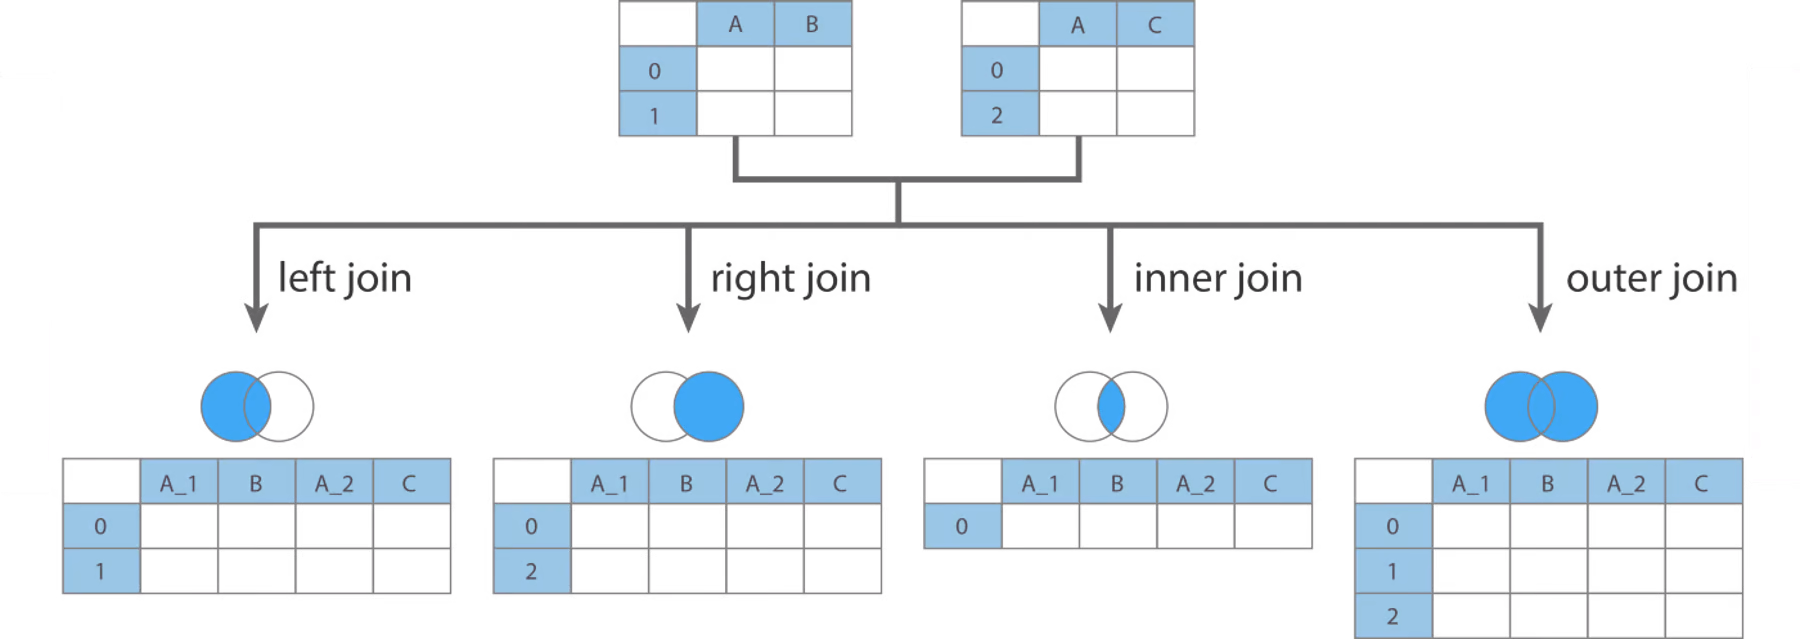

##### Creamos dataframes para poder dar ejemplos

Creamos DataFrame **a**

In [ ]:
compra_1={'elementos':[1,2,3,4,5],'categorias':['vegetal','vegetal','fruta','vegetal','fruta'],'nombres':['zanahoria','coliflor','manzana','patata','uvas']}
a = pd.DataFrame(compra_1, columns=['elementos','categorias','nombres'])
a

,elementos,categorias,nombres
0,1,vegetal,zanahoria
1,2,vegetal,coliflor
2,3,fruta,manzana
3,4,vegetal,patata
4,5,fruta,uvas


Creamos DataFrame **b**

In [ ]:
compra_2={'elementos':[4,5,6,7,8],'categorias':['vegetal','fruta','fruta','vegetal','fruta'],'nombres':['brócoli','mango','pera','guisantes','sandía']}
b = pd.DataFrame(compra_2, columns=['elementos','categorias','nombres'])
b

,elementos,categorias,nombres
0,4,vegetal,brócoli
1,5,fruta,mango
2,6,fruta,pera
3,7,vegetal,guisantes
4,8,fruta,sandía


Creamos DataFrame **c**

In [ ]:
compra_3={'elementos':[1,2,3,4,5,6,7,8,9,10],'precio':[12,23,98,15,88,24,67,58,26,96]}
c = pd.DataFrame(compra_3, columns=['elementos','precio'])
c

,elementos,precio
0,1,12
1,2,23
2,3,98
3,4,15
4,5,88
5,6,24
6,7,67
7,8,58
8,9,26
9,10,96


### Outer Join

Con un outer join de dos dataframes conseguimos en general un dataframe con todos los elementos de ambos dataframes.

Es decir, un outer join devuelve **todos los registros si hay un match en cualquiera de las tablas de la derecha o izquierda**

##### EJEMPLO

In [ ]:
a

,elementos,categorias,nombres
0,1,vegetal,zanahoria
1,2,vegetal,coliflor
2,3,fruta,manzana
3,4,vegetal,patata
4,5,fruta,uvas


In [ ]:
a.shape

(5, 3)

In [ ]:
b

,elementos,categorias,nombres
0,4,vegetal,brócoli
1,5,fruta,mango
2,6,fruta,pera
3,7,vegetal,guisantes
4,8,fruta,sandía


In [ ]:
b.shape

(5, 3)

In [ ]:
outer_join = pd.merge(a,b,on="elementos",how="outer")

In [ ]:
outer_join

,elementos,categorias_x,nombres_x,categorias_y,nombres_y
0,1,vegetal,zanahoria,NaN,NaN
1,2,vegetal,coliflor,NaN,NaN
2,3,fruta,manzana,NaN,NaN
3,4,vegetal,patata,vegetal,brócoli
4,5,fruta,uvas,fruta,mango
5,6,NaN,NaN,fruta,pera
6,7,NaN,NaN,vegetal,guisantes
7,8,NaN,NaN,fruta,sandía


### Inner Join

En un inner join, sólo los valores comunes entre los dos dataframes se conservan.

Es decir, devuelve los **valores que machean en ambas tablas**

##### EJEMPLO:

In [ ]:
inner_join = pd.merge(a,b,on="elementos",how="inner")

In [ ]:
inner_join

,elementos,categorias_x,nombres_x,categorias_y,nombres_y
0,4,vegetal,patata,vegetal,brócoli
1,5,fruta,uvas,fruta,mango


### Right Join

In [ ]:
pd.merge(a,b,on="elementos",how="right")

,elementos,categorias_x,nombres_x,categorias_y,nombres_y
0,4,vegetal,patata,vegetal,brócoli
1,5,fruta,uvas,fruta,mango
2,6,NaN,NaN,fruta,pera
3,7,NaN,NaN,vegetal,guisantes
4,8,NaN,NaN,fruta,sandía


### Left join

In [ ]:
pd.merge(a,b,on="elementos",how="left")

,elementos,categorias_x,nombres_x,categorias_y,nombres_y
0,1,vegetal,zanahoria,NaN,NaN
1,2,vegetal,coliflor,NaN,NaN
2,3,fruta,manzana,NaN,NaN
3,4,vegetal,patata,vegetal,brócoli
4,5,fruta,uvas,fruta,mango


## Join vía indices - .join( )

**join()** es básicamente un método similar al merge pero que utiliza los índices como *keys* del merge

##### EJEMPLO

In [ ]:
A1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']},index=['K0', 'K1', 'K2'])

In [ ]:
A2 = pd.DataFrame({'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2']},index=['K0', 'K2', 'K3'])

## Grouping

El group by nos permite agrupar un dataframe a nivel de valores únicos, aplicando una función de sumarización a las columnas restantes entorno al valor de índice

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],'C': np.random.randn(8),'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.874298,0.160443
1,bar,one,0.405777,-1.083231
2,foo,two,0.210765,0.651572
3,bar,three,-0.228504,-0.943374
4,foo,two,0.052003,0.379792
5,bar,two,-0.033196,1.411359
6,foo,one,0.036502,-0.116892
7,foo,three,-0.645332,0.593880


In [ ]:
df.groupby('A').sum()

<ipython-input-205-180a798bba5b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,0.144078,-0.615245
foo,-1.220360,1.668795


In [ ]:
df.groupby('B').mean()

<ipython-input-206-506f5172972c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('B').mean()


,C,D
B,,
one,-0.144006,-0.346560
three,-0.436918,-0.174747
two,0.076524,0.814241


### Funciones de agregación sobre columnas numéricas

In [ ]:
#aplicar sum a C y count a D
df.groupby('A').agg([np.sum,np.mean])

<ipython-input-208-834bdda23324>:2: FutureWarning: ['B'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('A').agg([np.sum,np.mean])


C                   D          
          sum      mean       sum      mean
A                                          
bar  0.144078  0.048026 -0.615245 -0.205082
foo -1.220360 -0.244072  1.668795  0.333759

### Funciones de agrupación sobre numéricas y categóricas

In [ ]:
df.groupby('A').max()

,B,C,D
A,,,
bar,two,0.405777,1.411359
foo,two,0.210765,0.651572


### Group by a varios niveles

In [ ]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.405777 -1.083231
    three -0.228504 -0.943374
    two   -0.033196  1.411359
foo one   -0.418898  0.021775
    three -0.645332  0.593880
    two    0.131384  0.515682

### Detalle de funciones de agregación o agrupación

|Función|Descripción|
|----|:------|
|mean()|Calcula la media del grupo|
|sum()|Calcula la suma del grupo de valores |
|size()|Calcula el tamaño del grupo|
|count()|Calcula el contador del grupo|
|std()|Calcula la desviación estandar del grupo|
|var()|Calcula la varianza del grupo|
|sem()|Calcula el error estandar del grupo|
|describe()|Genera estadística descriptiva|
|first()|Devuelve el primer elemento del grupo|
|last()|Devuelve el último elemento del grupo|
|nth()|Coge el *n*th elemento del grupo|
|min()|Calcula el valor mínimo del grupo|
|max()|Cacula el valor máximo del grupo|

### Aplicar múltiples funciones de golpe

# Tabla de datos Titanic

El fichero titanic.csv contiene información sobre los pasajeros del Titanic. Escribir un programa con los siguientes requisitos:

Generar un DataFrame con los datos del fichero. Para importar usaremos Pandas.
* Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas
* Mostrar por pantalla los datos del pasajero con identificador 148.
* Mostrar por pantalla las filas pares del DataFrame.
* Mostrar por pantalla los nombres de las personas que iban en primera clase ordenadas alfabéticamente.
* Mostrar por pantalla el porcentaje de personas que sobrevivieron y murieron.
* Mostrar por pantalla el porcentaje de personas que sobrevivieron en cada clase.
* Eliminar del DataFrame los pasajeros con edad desconocida.
* Mostrar por pantalla la edad media de las mujeres que viajaban en cada clase.
* Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.
* Mostrar por pantalla el porcentaje de menores y mayores de edad que sobrevivieron en cada clase.

In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/NDS/Python/Nuria/Clases sin resolver/Clases Python for Data Science - class version/titanic.csv')


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.size

10692

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
df[df["PassengerId"] == 148]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S


In [ ]:
df[df.index % 2 == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df[df["Pclass"]==1].sort_values("Name")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
460,461,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
155,156,0,1,"Williams, Mr. Charles Duane",male,51.00,0,1,PC 17597,61.3792,NaN,C
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
555,556,0,1,"Wright, Mr. George",male,62.00,0,0,113807,26.5500,NaN,S


In [11]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
df.groupby("Pclass").mean()["Survived"]

<ipython-input-13-7695dd38c165>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Pclass").mean()["Survived"]


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#Tenemos 177 pasajeros con edad desconocida
df.dropna(subset=["Age"],inplace=True)

In [18]:
df[df["Sex"]=="female"].groupby("Pclass").mean()["Survived"]

<ipython-input-18-a1eb5854c23d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df["Sex"]=="female"].groupby("Pclass").mean()["Survived"]


Pclass
1    0.964706
2    0.918919
3    0.460784
Name: Survived, dtype: float64

In [19]:
df["es mayor de edad"] = (df["Age"]>=18).astype(int)

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,es mayor de edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [21]:
df["es mayor de edad"].value_counts(normalize=True)

1    0.841737
0    0.158263
Name: es mayor de edad, dtype: float64

In [22]:
df.groupby("es mayor de edad").mean()["Survived"]

<ipython-input-22-880a47c35a0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("es mayor de edad").mean()["Survived"]


es mayor de edad
0    0.539823
1    0.381032
Name: Survived, dtype: float64